# Question Q17

*Question*: Do you use Automated Machine Learning (AutoML) tools in your ML-enabled system projects?

*Answer Type*: Single Option and Free Field

*Options*: [Yes, please specify; No]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Basic Analysis

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
auto_ml_options = {
    'Q17_Automated_Machine_Learning_Tools_Yes_Free': 'Yes',
    'Q17_Automated_Machine_Learning_Tools_Yes_No': 'No'
}

In [5]:
dataframe_obj.df[['Q17_Automated_Machine_Learning_Tools_Yes_Free', 'Q17_Automated_Machine_Learning_Tools_Yes_No']].head()

,Q17_Automated_Machine_Learning_Tools_Yes_Free,Q17_Automated_Machine_Learning_Tools_Yes_No
0,-99,0
1,-99,No
2,Own approach,"Yes, Please, specify"
3,-99,No
4,-99,No


In [6]:
dataframe_obj.df[['Q17_Automated_Machine_Learning_Tools_Yes_Free', 'Q17_Automated_Machine_Learning_Tools_Yes_No']].value_counts()

Q17_Automated_Machine_Learning_Tools_Yes_Free         Q17_Automated_Machine_Learning_Tools_Yes_No
-99                                                   No                                             135
                                                      0                                               19
Auto-sklearn                                          Yes, Please, specify                             4
-99                                                   Yes, Please, specify                             2
H2O                                                   Yes, Please, specify                             2
Dataiku                                               Yes, Please, specify                             2
 AutoKeras                                            Yes, Please, specify                             1
Our in house developed AutoML tool                    Yes, Please, specify                             1
Microsoft Azure Continuous Integration Pipeline       Yes, Ple

### Wordcloud

In [10]:
# remove unnecessary values
automl_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['Q17_Automated_Machine_Learning_Tools_Yes_Free'])))
automl_free = list(filter(lambda a: str(a) != '-66', automl_free))

In [11]:
automl_words = format_wordcloud_text(texts=automl_free, use_sep=False)

In [12]:
# plot object
q17_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(automl_words.keys()), 'Weight': list(automl_words.values())}
))

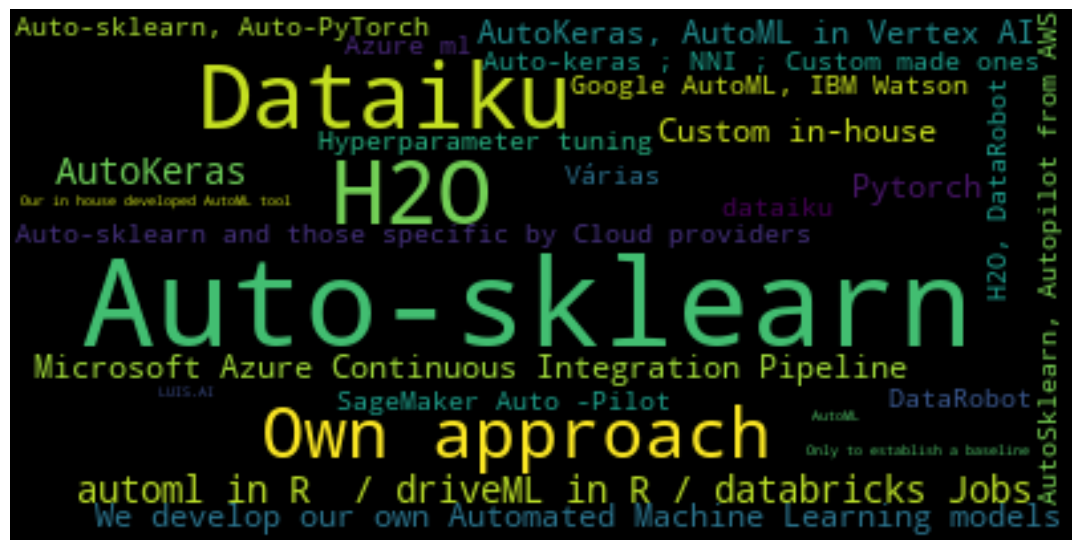

In [13]:
q17_wc_plot.wordcloud("Word", 'Weight')